# Inferential Statistics with Python Project


**Inferential Statistics** is the subject matter of this project.This project focuses on Inferential Statistics, a field dedicated to drawing conclusions about populations from sample data. Employing techniques like z-test, t-test, and p-value analysis, the project delves into Hypothesis Testing. For categorical variables, the Chi-squared test is applied, while One-Way ANOVA is used to analyze scenarios with more than two subgroups. Additionally, the project involves calculating Confidence Intervals and determining margins of error.

## Note

1) Performed all the Statistical analysis with 5% (Significance level). 
2) Assume all the features are normally distributed and have equal variance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
import statistics

from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import shapiro
from scipy.stats import levene
from statsmodels.stats import power

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from scipy import stats

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

import statsmodels.stats.multicomp as mc

### 1. Performed the following statistical analysis on the fifa world cup dataset. The dataset consists of player information, which includes height; weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed.

In [2]:
df_fifa=pd.read_csv(r'Downloads/fifa_stats.csv')

In [3]:
df_fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [4]:
df_fifa.shape

(2000, 15)

In [5]:
df_fifa.size

30000

In [6]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [7]:
df_fifa['Jersey Number']=df_fifa['Jersey Number'].astype('object')

In [8]:
df_fifa['Club'].fillna('Not Assigned', inplace = True)

In [9]:
df_fifa['Attacking Work Rate'] = df_fifa['Work Rate'].str.split('/').str[0]

In [10]:
df_fifa['Defensive Work Rate'] = df_fifa['Work Rate'].str.split('/').str[1]

In [11]:
df_fifa.drop(labels = 'Work Rate', axis=1, inplace = True)

In [12]:
df_fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Height,Weight,Attacking Work Rate,Defensive Work Rate
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,RF,10,5.583333,159,Medium,Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,ST,7,6.166667,183,High,Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,LW,10,5.750000,150,High,Medium
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,GK,1,6.333333,168,Medium,Medium
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,RCM,7,5.083333,154,High,High


In [13]:
df_fifa.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall_rating              0
Potential                   0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
Attacking Work Rate         0
Defensive Work Rate         0
dtype: int64

**a)	Assuming age as population, performed the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation.**

In [14]:
age = df_fifa['Age']
pop_mean = np.mean(age)
pop_std = statistics.stdev(age)

In [15]:
samp_age = random.sample(population = sorted(age), k = 200)
samp_mean = np.mean(samp_age)
samp_std = statistics.stdev(samp_age)
n = 200
print(f'The mean of sampling distribution is {samp_mean} yrs')

The mean of sampling distribution is 27.55 yrs


In [16]:
s_err  = np.abs(round(pop_mean - samp_mean,4))
print(f'Standard error in age is {s_err} yrs')

Standard error in age is 0.3185 yrs


As the sample size increases, the sample means cluster more and more around the population mean.
As the sample means moves toward the population mean, the sampling error decreases

In [17]:
z_alpha_by_2 = np.abs(round(stats.norm.isf(0.05/2),4))

error = round((z_alpha_by_2 * samp_std)/np.sqrt(n),4)

print(f'Margin of error in age is {error} yrs')

Margin of error in age is 0.5287 yrs


In [18]:
print('95% Interval:', samp_mean - error, samp_mean + error)

95% Interval: 27.0213 28.0787


With 95% confidence,Population mean lies between the 26.914 and 27.966

**b)	Is there any evidence that the players overall rating is greater than 80?**

Let the null and the alternate hypothesis be as follows:
- H0: mu <= 80 i.e. there is no evidence that the players overall rating is greater than 80
- H1: mu > 80 i.e. there is any evidence that the players overall rating is greater than 80

In [19]:
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


i.e. if z for a right-tailed test is greater than 1.64 then we reject the null hypothesis

In [20]:
z_score, pval = stests.ztest(x1 = df_fifa['Overall_rating'], value = 80, alternative = 'larger')

print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  -24.538460498672062
p-value:  1.0


From the above details, we can conclude the following:
- z-score (-24.53) < z-critical (1.64)
- p-value (1.0) > 0.05

Hence we fail to reject the null hypothesis  
So we can say that there is not enough evidence to say that the players overall rating is greater than 80

**c)	Performed the statistical test to identify whether preferred foot has any impact on potential.**

Let the null & the alternate hypothesis be as folows:
- H0: The variables preferred foot & potential are independent
- H1: The variables preferred foot & potential are dependent

In [21]:
table = pd.crosstab(df_fifa['Preferred Foot'], df_fifa['Potential'])
 
observed_value = table.values
observed_value

array([[ 59,  42,  41,  31,  34,  51,  32,  29,  30,  32,  17,  17,  16,
          9,  13,   6,   1,   4,   0,   2,   0],
       [153, 182, 176, 114, 120, 142, 111, 100, 107,  78,  79,  49,  36,
         32,  18,  15,  11,   5,   4,   1,   1]], dtype=int64)

In [22]:
r=len(observed_value)
c=len(observed_value[0])

In [23]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = (r-1)*(c-1)), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 31.4104


i.e. if the chi-square value is greater than 31.4104, we reject the null hypothesis

In [24]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 29.55053700074528
p-value: 0.07747130218941192
Degrees of freedom: 20
Expected values: [[ 49.396  52.192  50.561  33.785  35.882  44.969  33.319  30.057  31.921
   25.63   22.368  15.378  12.116   9.553   7.223   4.893   2.796   2.097
    0.932   0.699   0.233]
 [162.604 171.808 166.439 111.215 118.118 148.031 109.681  98.943 105.079
   84.37   73.632  50.622  39.884  31.447  23.777  16.107   9.204   6.903
    3.068   2.301   0.767]]


From the above details we can conclude the following:
- test-statistic (29.55) < Critical chi-square (31.41)
- p-value (0.07) > 0.05

Hence we fail to reject our null hypothesis  
The variables preferred foot & potential are independent  
So we can conclude that we have no evidence to claim that preferred foot has an impact on potential

**d)	Performed the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].**

Let the null & the alternate hypothesis be as folows:
- H0: The variables overall rating & potential are independent
- H1: The variables overall rating & potential are dependent

In [25]:
table = pd.crosstab(df_fifa['Overall_rating'], df_fifa['Potential'])
 
observed_value = table.values
observed_value

array([[212,  34,  15,  37,  22,  32,  22,  17,  12,  11,  10,   2,   1,
          1,   1,   0,   0,   0,   0,   0,   0],
       [  0, 190,  40,  16,  25,  18,  26,  11,  22,   8,   7,   5,   3,
          2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 162,  31,  11,  18,  11,  24,  17,  10,   9,   3,   2,
          1,   4,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,  61,  15,  22,  15,   5,  16,  15,   5,   7,   3,
          3,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  81,  26,  12,  11,   8,  11,   7,  11,   3,
          1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  77,  13,   6,  11,   7,  18,   4,   3,
          1,   2,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  44,  10,   4,  10,   5,   7,   5,
          4,   4,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  45,  15,   4,   9,   3,   8,
          5,   2,   1,   1,   0,   1,   0,   0],
       [  0,   0,   0,  

In [26]:
r=len(observed_value)
c=len(observed_value[0])

In [27]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = (r-1)*(c-1)), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 405.2435


i.e. if the chi-square value is greater than 405.2435, we reject the null hypothesis

In [28]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 8592.974091115166
p-value: 0.0
Degrees of freedom: 360
Expected values: [[4.54740e+01 4.80480e+01 4.65465e+01 3.11025e+01 3.30330e+01 4.13985e+01
  3.06735e+01 2.76705e+01 2.93865e+01 2.35950e+01 2.05920e+01 1.41570e+01
  1.11540e+01 8.79450e+00 6.64950e+00 4.50450e+00 2.57400e+00 1.93050e+00
  8.58000e-01 6.43500e-01 2.14500e-01]
 [3.95380e+01 4.17760e+01 4.04705e+01 2.70425e+01 2.87210e+01 3.59945e+01
  2.66695e+01 2.40585e+01 2.55505e+01 2.05150e+01 1.79040e+01 1.23090e+01
  9.69800e+00 7.64650e+00 5.78150e+00 3.91650e+00 2.23800e+00 1.67850e+00
  7.46000e-01 5.59500e-01 1.86500e-01]
 [3.22240e+01 3.40480e+01 3.29840e+01 2.20400e+01 2.34080e+01 2.93360e+01
  2.17360e+01 1.96080e+01 2.08240e+01 1.67200e+01 1.45920e+01 1.00320e+01
  7.90400e+00 6.23200e+00 4.71200e+00 3.19200e+00 1.82400e+00 1.36800e+00
  6.08000e-01 4.56000e-01 1.52000e-01]
 [1.78080e+01 1.88160e+01 1.82280e+01 1.21800e+01 1.29360e+01 1.62120e+01
  1.20120e+01 1.08360e+01 1.15080e+01 9.24000e+00 8.064

From the above details we can conclude the following:
- test-statistic (8592.97) > Critical chi-square (405.24)
- p-value (0.0) < 0.05

Hence we reject our null hypothesis  
So we can conclude that the variables overall rating & potential are dependent

**e)	Does skill move have any effect in overall rating?**

Let the null & the alternate hypothesis be as folows:
- H0: The variables skill move & overall rating are independent
- H1: The variables skill move & overall rating are dependent

In [29]:
table = pd.crosstab(df_fifa['Skill Moves'], df_fifa['Overall_rating'])
 
observed_value = table.values
observed_value

array([[ 38,  32,  23,  15,  19,  18,   5,  12,  13,   7,   2,   1,   1,
          3,   3,   1,   1,   0,   0],
       [ 96,  78,  63,  30,  24,  25,  13,  20,  10,  10,  12,   6,   3,
          2,   2,   1,   0,   0,   0],
       [219, 171, 138,  64,  72,  56,  28,  24,  17,  11,   9,   4,   7,
          2,   3,   1,   2,   0,   0],
       [ 74,  92,  75,  59,  52,  41,  43,  34,  27,  13,   8,   9,   1,
          7,   3,   2,   3,   0,   1],
       [  2,   0,   5,   0,   4,   3,   4,   4,   3,   4,   2,   2,   1,
          3,   0,   0,   0,   1,   1]], dtype=int64)

In [30]:
r=len(observed_value)
c=len(observed_value[0])

In [31]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = (r-1)*(c-1)), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 92.8083


In [32]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 264.3544361441865
p-value: 9.004103479489286e-24
Degrees of freedom: 72
Expected values: [[4.16130e+01 3.61810e+01 2.94880e+01 1.62960e+01 1.65870e+01 1.38710e+01
  9.02100e+00 9.11800e+00 6.79000e+00 4.36500e+00 3.20100e+00 2.13400e+00
  1.26100e+00 1.64900e+00 1.06700e+00 4.85000e-01 5.82000e-01 9.70000e-02
  1.94000e-01]
 [8.47275e+01 7.36675e+01 6.00400e+01 3.31800e+01 3.37725e+01 2.82425e+01
  1.83675e+01 1.85650e+01 1.38250e+01 8.88750e+00 6.51750e+00 4.34500e+00
  2.56750e+00 3.35750e+00 2.17250e+00 9.87500e-01 1.18500e+00 1.97500e-01
  3.95000e-01]
 [1.77606e+02 1.54422e+02 1.25856e+02 6.95520e+01 7.07940e+01 5.92020e+01
  3.85020e+01 3.89160e+01 2.89800e+01 1.86300e+01 1.36620e+01 9.10800e+00
  5.38200e+00 7.03800e+00 4.55400e+00 2.07000e+00 2.48400e+00 4.14000e-01
  8.28000e-01]
 [1.16688e+02 1.01456e+02 8.26880e+01 4.56960e+01 4.65120e+01 3.88960e+01
  2.52960e+01 2.55680e+01 1.90400e+01 1.22400e+01 8.97600e+00 5.98400e+00
  3.53600e+00 4.62400e+00 2.99200e+0

From the above details we can conclude the following:
- test-statistic (264.35) > Critical chi-square (92.81)
- p-value (9e-24) < 0.05

Hence we reject our null hypothesis  
The variables skill moves & overall rating are dependent  
So we can conclude that skill move have an effect in overall rating

### 2. Performed the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, and messages of various network. Data Cleaning and basic EDA process needs to be performed. 

In [33]:
df_phone=pd.read_csv(r'Downloads\phone.csv')

In [34]:
df_phone.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [35]:
df_phone.shape

(820, 6)

In [36]:
df_phone.size

4920

In [37]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [38]:
df_phone['date'] = df_phone['date'].str.split(' ').str[0]

In [39]:
df_phone['year'] = df_phone['month'].str.split('-').str[0]

In [40]:
df_phone['month'] = df_phone['month'].str.split('-').str[1]

In [41]:
df_phone.head()

,date,duration,item,month,network,network_type,year
0,15-10-14,221.321120,data,11,data,data,2014
1,15-10-14,81.610599,call,11,Vodafone,mobile,2014
2,15-10-14,143.109111,call,11,Meteor,mobile,2014
3,15-10-14,111.888670,call,11,Tesco,mobile,2014
4,15-10-14,246.695171,call,11,Tesco,mobile,2014


**a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.**

In [42]:
pop_mean = np.mean(df_phone['duration'])
pop_std = statistics.stdev(df_phone['duration'])
n = len(df_phone['duration'])

In [43]:
z_95 = stats.norm.isf(q=0.05/2)
z_99 = stats.norm.isf(q=0.01/2)

In [44]:
e_95 = (z_95*pop_std)/np.sqrt(n)
e_99 = (z_99*pop_std)/np.sqrt(n)

In [45]:
print('95% Interval:', pop_mean - e_95, pop_mean + e_95)
print('99% Interval:', pop_mean - e_99, pop_mean + e_99)

95% Interval: 141.17783972883012 147.43203139084062
99% Interval: 140.1952350040881 148.41463611558265


The interval with 99% confidence has a wider interval

**b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.**

Let the null and the alternate hypothesis be as follows:
- H0: The networks are equally distributed
- H1: The networks aren't equally distributed

In [46]:
gr_A = df_phone[df_phone['network'] == 'Vodafone']['duration']
gr_B = df_phone[df_phone['network'] == 'Three']['duration']
gr_C = df_phone[df_phone['network'] == 'data']['duration']
gr_D = df_phone[df_phone['network'] == 'Meteor']['duration']
gr_E = df_phone[df_phone['network'] == 'Tesco']['duration']
gr_F = df_phone[df_phone['network'] == 'landline']['duration']
gr_G = df_phone[df_phone['network'] == 'voicemail']['duration']

In [47]:
t = df_phone['network'].nunique()
print('t:', t)

N = df_phone['network'].value_counts().sum()
print('N:', N)

t: 7
N: 820


In [48]:
f = np.abs(round(stats.f.isf(q = 0.05, dfn = t-1, dfd = N-t), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 2.1097


i.e. if the test statistic value is greater than 2.1097 then we reject the null hypothesis

In [49]:
f_test, p_val = stats.f_oneway(gr_A, gr_B, gr_C, gr_D, gr_E)

print('Test statistic:', f_test)
print('p-value:', p_val)

Test statistic: 1.369457971851241
p-value: 0.24281208324273848


From the above details we can conclude the following:
- test-statistic (1.37) < Critical F-test (2.1)
- p-value (0.24) > 0.05

Hence we fail to reject our null hypothesis  
So we can conclude that the networks are equally distributed

**c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.**

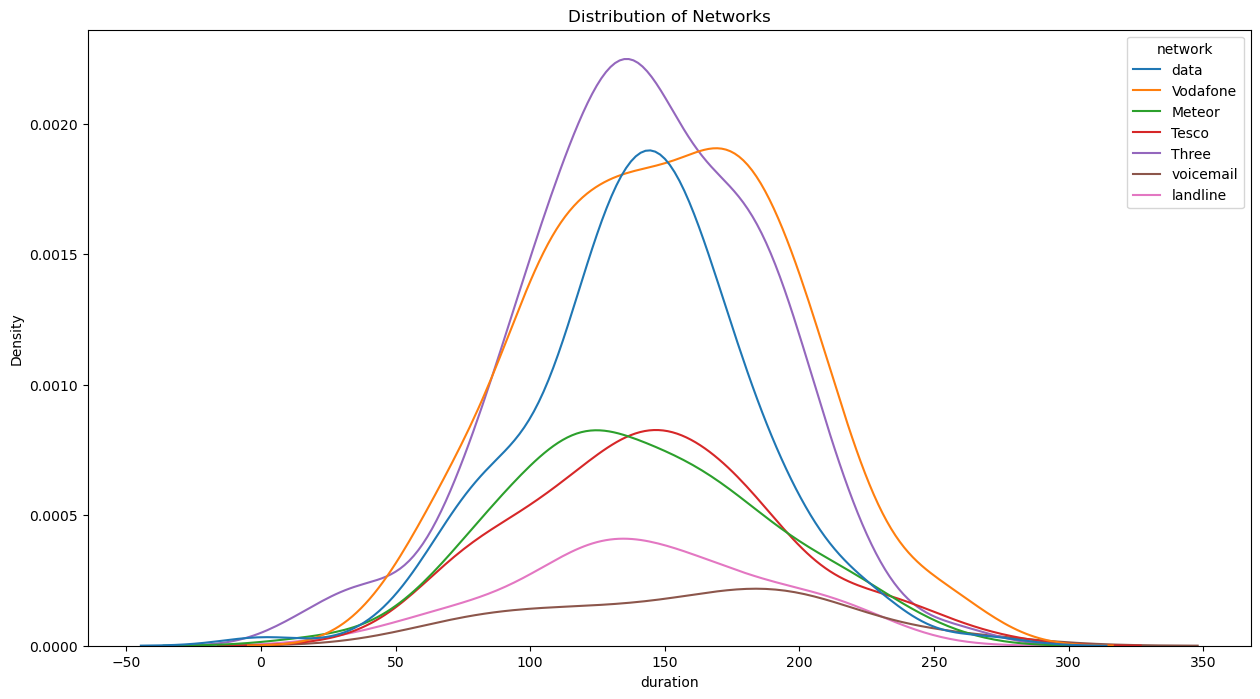

In [50]:
plt.figure(figsize=(15,8))
sns.kdeplot(data = df_phone, x = 'duration', hue='network')
plt.title('Distribution of Networks')
plt.show()

From the above distributions we can see that all the networks are similar to normal distribution.Even in point b) we concluded that the networks are equally distributed.

**d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.**

Let the null and the alternate hypothesis be as follows:
- H0: The varaibles item and duration are independent
- H1: The variables item and duration are dependent

In [51]:
table = pd.crosstab(df_phone['item'], df_phone['duration'])
 
observed_value = table.values
observed_value

array([[0, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 0]], dtype=int64)

In [52]:
r=len(observed_value)
c=len(observed_value[0])

In [53]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = (r-1)*(c-1)), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 1733.2687


i.e. if the chi-square value is greater than 1733.2687, we reject the null hypothesis

In [54]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 1640.0
p-value: 0.4814258260445956
Degrees of freedom: 1638
Expected values: [[0.47317073 0.47317073 0.47317073 ... 0.47317073 0.47317073 0.47317073]
 [0.18292683 0.18292683 0.18292683 ... 0.18292683 0.18292683 0.18292683]
 [0.34390244 0.34390244 0.34390244 ... 0.34390244 0.34390244 0.34390244]]


From the above details we can conclude the following:
- test-statistic (1640) < Critical chi-square (1733.27)
- p-value (0.48) > 0.05

Hence we fail to reject our null hypothesis  
So we can conclude that the variables item and duration are dependent

**e)	Perform statistical tests to identify the relation between network and network_type.**

Let the null and the alternate hypothesis be as follows:
- H0: The varaibles network and network type are independent
- H1: The variables network and network type are dependent

In [55]:
table = pd.crosstab(df_phone['network'], df_phone['network_type'])
 
observed_value = table.values
observed_value

array([[  0,   0,  87,   0],
       [  0,   0,  84,   0],
       [  0,   0, 215,   0],
       [  0,   0, 215,   0],
       [150,   0,   0,   0],
       [  0,  42,   0,   0],
       [  0,   0,   0,  27]], dtype=int64)

In [56]:
r=len(observed_value)
c=len(observed_value[0])

In [57]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = (r-1)*(c-1)), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 28.8693


i.e. if the chi-square value is greater than 28.8693, we reject the null hypothesis

In [58]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 2460.0
p-value: 0.0
Degrees of freedom: 18
Expected values: [[ 15.91463415   4.45609756  63.76463415   2.86463415]
 [ 15.36585366   4.30243902  61.56585366   2.76585366]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 27.43902439   7.68292683 109.93902439   4.93902439]
 [  7.68292683   2.15121951  30.78292683   1.38292683]
 [  4.93902439   1.38292683  19.78902439   0.88902439]]


From the above details we can conclude the following:
- test-statistic (2460) > Critical chi-square (28.8693)
- p-value (0.0) > 0.05

Hence we reject our null hypothesis  
So we can conclude that the variables network and network type are dependent